import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", {"id": "per_game_stats"})


headers = [ "Player", "Pos", "Age", "Tm", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%",
           "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK",
           "TOV", "PF", "PTS"]

# Extract the table rows
rows = []
for row in table.find_all("tr"):
    data = [cell.get_text() for cell in row.find_all("td")]
    if data:
        rows.append(data)

df = pd.DataFrame(rows, columns=headers)
display(df)


#df.to_csv('NBA_2024_per_game.csv', index=False)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
from sklearn.impute import SimpleImputer

/Users/kaushiknarasimha/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
df= pd.read_csv('NBA_2024_per_game.csv')

In [20]:
df['MP'] = pd.to_numeric(df['MP'], errors='coerce')

# Filter rows where 'MP' is greater than 5
df = df.loc[df['MP'] > 5]

In [21]:
df.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,24,TOR,9,0,19.8,3.1,6.9,0.452,...,0.636,1.9,4.6,6.4,2.2,0.4,0.3,1.4,2.0,7.4
1,Bam Adebayo,C,26,MIA,13,13,34.4,8.3,15.5,0.537,...,0.825,2.2,8.0,10.2,4.1,1.3,1.1,2.7,2.4,22.8
2,Ochai Agbaji,SG,23,UTA,14,6,19.0,1.6,4.1,0.397,...,0.500,1.0,1.9,2.9,0.9,0.4,0.8,0.6,1.6,4.4
3,Santi Aldama,PF,23,MEM,7,1,25.7,5.9,12.9,0.456,...,0.500,1.3,5.1,6.4,2.6,0.7,0.7,1.7,1.4,14.7
4,Nickeil Alexander-Walker,SG,25,MIN,13,2,20.8,2.2,5.2,0.426,...,0.333,0.2,1.7,1.8,2.5,0.8,0.8,0.9,1.5,5.8


In [22]:
players=df.Player.value_counts()
traded_players=players[players>1].keys()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 487
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  416 non-null    object 
 1   Pos     416 non-null    object 
 2   Age     416 non-null    int64  
 3   Tm      416 non-null    object 
 4   G       416 non-null    int64  
 5   GS      416 non-null    int64  
 6   MP      416 non-null    float64
 7   FG      416 non-null    float64
 8   FGA     416 non-null    float64
 9   FG%     415 non-null    float64
 10  3P      416 non-null    float64
 11  3PA     416 non-null    float64
 12  3P%     388 non-null    float64
 13  2P      416 non-null    float64
 14  2PA     416 non-null    float64
 15  2P%     410 non-null    float64
 16  eFG%    415 non-null    float64
 17  FT      416 non-null    float64
 18  FTA     416 non-null    float64
 19  FT%     385 non-null    float64
 20  ORB     416 non-null    float64
 21  DRB     416 non-null    float64
 22  TR

In [18]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Top 10 players by points and assists

figure, axes = plt.subplots(2, 1, figsize=(6,10)) 
sns.barplot(ax=axes[0],x='PTS',y='Player', data=df.sort_values('PTS', ascending=False).iloc[0:10,:])
sns.barplot(ax=axes[1],x='AST',y='Player', data=df.sort_values('AST', ascending=False).iloc[0:10,:])
plt.show()

In [26]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots



In [28]:
# Create subplots with two columns
fig = make_subplots(rows=1, cols=2, subplot_titles=['Top 10 Players by PTS', 'Top 10 Players by AST'])

# Bar plot for 'PTS'
trace_pts = go.Bar(x=df.sort_values('PTS', ascending=False).iloc[0:10]['Player'],
                   y=df.sort_values('PTS', ascending=False).iloc[0:10]['PTS'],
                   marker=dict(color='blue'))

# Bar plot for 'AST'
trace_ast = go.Bar(x=df.sort_values('AST', ascending=False).iloc[0:10]['Player'],
                   y=df.sort_values('AST', ascending=False).iloc[0:10]['AST'],
                   marker=dict(color='green'))

# Add traces to the subplot
fig.add_trace(trace_pts, row=1, col=1)
fig.add_trace(trace_ast, row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Players by PTS and AST', showlegend=False)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

## AST vs PTS

In [132]:
import plotly.express as px

# Define a color scale mapping for positions
pos_color_mapping = {
    'C': 'red',
    'SG': 'blue',
    'PF': 'green',
    'SF': 'orange',
    'PG': 'magenta'    
}

# Map the 'Pos' column to colors
df['Color'] = df['Pos'].map(pos_color_mapping)

# Add a new column for marker size with a constant value (e.g., 5)
df['Marker_Size'] = 5

# Filter out players with multiple positions
df_filtered = df[~df['Pos'].str.contains('-')]

# Filter the top 15 players for each position
top_players = df_filtered.groupby('Pos').apply(lambda x: x.nlargest(25, 'PTS')).reset_index(drop=True)

# Create a scatter plot using Plotly Express
fig = px.scatter(top_players, x='AST', y='PTS', hover_name="Player", color='Pos', size='Marker_Size', opacity=0.7,
                 title='Scatter Plot of AST vs PTS (Top 25 Players per Position)',
                 labels={'AST': 'Assists', 'PTS': 'Points'},
                 color_discrete_map=pos_color_mapping)

# Update the legend title
fig.update_layout(legend_title_text='Position')

# Adjust the maximum marker size
fig.update_traces(marker=dict(size=10, sizemode='diameter', sizeref=0.1))

# Show the interactive plot
fig.show()

Along the y-axis, the players' position are uniform, indicating that no specific role outperforms others in terms of points. However, along the x-axis, we observe that the majority of players on the right, who contribute significantly to assists, are playmakers."

It's possible to analyze the relationships between variables through a correlation matrix. There is a slight positive correlation observed among all variables. Notably, PTS exhibits stronger correlations with 2P and FT.

## Correlation

In [60]:
# Select the columns for the correlation heatmap
corr_columns = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', '3P', '2P', 'FT']

# Calculate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Create an interactive heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=corr_columns,
                y=corr_columns,
                color_continuous_scale="reds",  # Use a predefined colorscale name
                zmin=-1, zmax=1
               )

# Set axis labels and title
fig.update_layout(
    xaxis=dict(title='Stats'),
    yaxis=dict(title='Stats'),
    title='Correlation Heatmap of Key Basketball Stats'
)

# Add annotations to each box
annotations = []
for i, row in enumerate(corr_columns):
    for j, col in enumerate(corr_columns):
        annotations.append(dict(x=col, y=row, text=str(correlation_matrix.iloc[i, j].round(2)),
                                font=dict(color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black'),
                                showarrow=False))

fig.update_layout(annotations=annotations)

# Show the interactive plot
fig.show()

## Player Comparision

In [63]:
stats = df[['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK']].copy()

stats['PTS'] = pd.qcut(stats['PTS'], q=5, labels=False) + 1
stats['AST'] = pd.qcut(stats['AST'], q=5, labels=False) + 1
stats['TRB'] = pd.qcut(stats['TRB'], q=5, labels=False) + 1
stats['STL'] = pd.qcut(stats['STL'], q=5, labels=False) + 1

# For 'BLK', the warnings are due to duplicate labels, you can use the duplicates='drop' argument
# and then add 1 to values greater than 1
stats['BLK'] = pd.qcut(stats['BLK'], q=5, labels=False, duplicates='drop') + 1
stats.loc[stats.BLK > 1, 'BLK'] = stats.loc[stats.BLK > 1, 'BLK'] + 1

stats = pd.melt(stats, id_vars=['Player'], value_vars=['PTS', 'AST', 'TRB', 'STL', 'BLK'])



In [69]:
# Get player names from user input
player1 = input("Enter the name of the first player: ")
player2 = input("Enter the name of the second player: ")

players = [player1, player2]
stats_filtered = stats.loc[stats['Player'].isin(players)]

# Generate a title with player names
title = f"Comparing player stats: {', '.join(players)}"

fig = px.line_polar(stats_filtered, r='value', theta='variable', line_close=True, color='Player', title=title)

fig.show()

Enter the name of the first player: Kevin Durant
Enter the name of the second player: Stephen Curry


/Users/kaushiknarasimha/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/kaushiknarasimha/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [100]:
# Get player names from user input
player1 = input("Enter the name of the first player: ")
player2 = input("Enter the name of the second player: ")

players = [player1, player2]
stats_filtered = stats.loc[stats['Player'].isin(players)]

# Generate a title with player names
title = f"Comparing player stats: {', '.join(players)}"

# Create separate polar line plots for each player
fig1 = px.line_polar(stats_filtered[stats_filtered['Player'] == player1],
                     r='value', theta='variable', line_close=True, color='Player',
                     title=f"{player1}'s Stats")

fig2 = px.line_polar(stats_filtered[stats_filtered['Player'] == player2],
                     r='value', theta='variable', line_close=True, color='Player',
                     title=f"{player2}'s Stats")

# Set grid properties
grid_props = dict(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Update layout for the first plot
fig1.update_layout(title=title, polar=dict(radialaxis=dict(visible=True, **grid_props), angularaxis=dict(**grid_props)))

# Update layout for the second plot
fig2.update_layout(polar=dict(radialaxis=dict(visible=True, **grid_props), angularaxis=dict(**grid_props)))

fig1.show()
fig2.show()




Enter the name of the first player: Kevin Durant
Enter the name of the second player: Devin Booker


/Users/kaushiknarasimha/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/kaushiknarasimha/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [79]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Get player names from user input
player1 = input("Enter the name of the first player: ")
player2 = input("Enter the name of the second player: ")

players = [player1, player2]
stats_filtered = stats.loc[stats['Player'].isin(players)]

# Generate a title with player names
title = f"Comparing player stats: {', '.join(players)}"

# Create separate polar subplots for each player using make_subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=[f"{player1}'s Stats", f"{player2}'s Stats"])

# Add scatterpolar traces to the subplots
fig.add_trace(go.Scatterpolar(
    r=stats_filtered[stats_filtered['Player'] == player1]['value'],
    theta=stats_filtered[stats_filtered['Player'] == player1]['variable'],
    fill='toself',
    name=player1
))

fig.add_trace(go.Scatterpolar(
    r=stats_filtered[stats_filtered['Player'] == player2]['value'],
    theta=stats_filtered[stats_filtered['Player'] == player2]['variable'],
    fill='toself',
    name=player2
))

fig.update_layout(title_text=title)
fig.show()

Enter the name of the first player: Kevin Durant
Enter the name of the second player: Devin Booker


## Top Performers in Various Categories

In [102]:
# Identifying top performers in key areas
top_scorers = df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(10)
top_assists = df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(10)
top_rebounders = df[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(10)
top_stealers = df[['Player', 'STL']].sort_values(by='STL', ascending=False).head(10)
top_blockers = df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(10)
top_fg_shooters = df[df['FGA'] > 5][['Player', 'FG%']].sort_values(by='FG%', ascending=False).head(10)
top_3pt_shooters = df[df['3PA'] > 2][['Player', '3P%']].sort_values(by='3P%', ascending=False).head(10)
top_ft_shooters = df[df['FTA'] > 2][['Player', 'FT%']].sort_values(by='FT%', ascending=False).head(10)

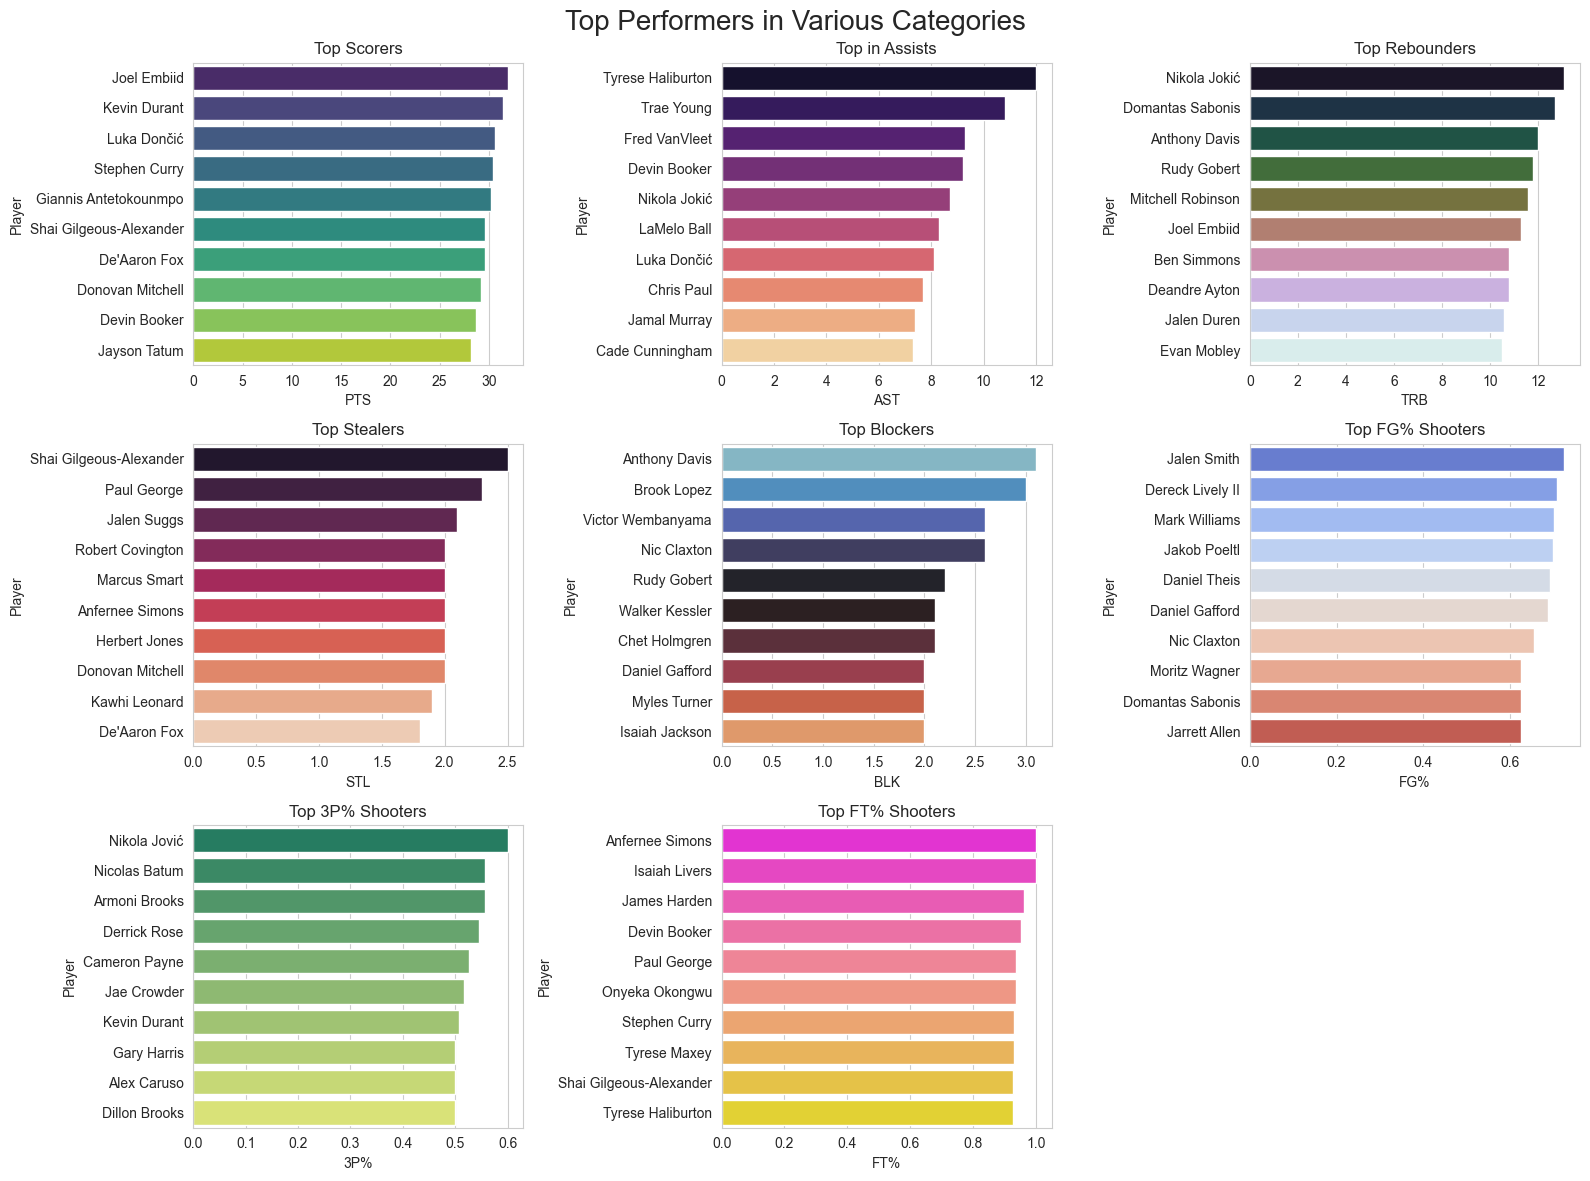

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Plotting the top performers in various categories
plt.subplot(3, 3, 1)
sns.barplot(x='PTS', y='Player', data=top_scorers, palette='viridis')
plt.title('Top Scorers')

plt.subplot(3, 3, 2)
sns.barplot(x='AST', y='Player', data=top_assists, palette='magma')
plt.title('Top in Assists')

plt.subplot(3, 3, 3)
sns.barplot(x='TRB', y='Player', data=top_rebounders, palette='cubehelix')
plt.title('Top Rebounders')

plt.subplot(3, 3, 4)
sns.barplot(x='STL', y='Player', data=top_stealers, palette='rocket')
plt.title('Top Stealers')

plt.subplot(3, 3, 5)
sns.barplot(x='BLK', y='Player', data=top_blockers, palette='icefire')
plt.title('Top Blockers')

plt.subplot(3, 3, 6)
sns.barplot(x='FG%', y='Player', data=top_fg_shooters, palette='coolwarm')
plt.title('Top FG% Shooters')

plt.subplot(3, 3, 7)
sns.barplot(x='3P%', y='Player', data=top_3pt_shooters, palette='summer')
plt.title('Top 3P% Shooters')

plt.subplot(3, 3, 8)
sns.barplot(x='FT%', y='Player', data=top_ft_shooters, palette='spring')
plt.title('Top FT% Shooters')


plt.suptitle('Top Performers in Various Categories', fontsize=20)

plt.tight_layout()
plt.show()

## Efficiency vs Minutes Played

In [ ]:
# Calculating Efficiency Metric
df['Basic Efficiency'] = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK']) - \
                        ((df['FGA'] - df['FG']) + (df['FTA'] - df['FT']) + df['TOV'])


In [118]:
# Grouping data by players and sorting by the basic efficiency metric
efficiency_sorted = df[['Player', 'Basic Efficiency', 'FG%', '3P%', 'FT%']].sort_values(by='Basic Efficiency', ascending=False)

# Displaying the top players by this basic efficiency metric
top_efficiency_players = efficiency_sorted.head(10)


,Player,Basic Efficiency,FG%,3P%,FT%
219,Nikola Jokić,38.4,0.573,0.297,0.790
121,Joel Embiid,36.3,0.497,0.319,0.877
143,Shai Gilgeous-Alexander,32.4,0.535,0.360,0.928
9,Giannis Antetokounmpo,32.0,0.621,0.259,0.619
163,Tyrese Haliburton,32.0,0.518,0.458,0.926
101,Anthony Davis,31.7,0.546,0.300,0.859
109,Luka Dončić,31.6,0.500,0.422,0.745
115,Kevin Durant,31.5,0.535,0.508,0.876
376,Domantas Sabonis,31.1,0.627,0.375,0.634
49,Devin Booker,30.5,0.500,0.400,0.952


In [119]:
print(top_efficiency_players.to_string(index=False))

                 Player  Basic Efficiency   FG%   3P%   FT%
           Nikola Jokić              38.4 0.573 0.297 0.790
            Joel Embiid              36.3 0.497 0.319 0.877
Shai Gilgeous-Alexander              32.4 0.535 0.360 0.928
  Giannis Antetokounmpo              32.0 0.621 0.259 0.619
      Tyrese Haliburton              32.0 0.518 0.458 0.926
          Anthony Davis              31.7 0.546 0.300 0.859
            Luka Dončić              31.6 0.500 0.422 0.745
           Kevin Durant              31.5 0.535 0.508 0.876
       Domantas Sabonis              31.1 0.627 0.375 0.634
           Devin Booker              30.5 0.500 0.400 0.952


In [122]:
# Scatter plot for Efficiency vs Minutes Played (MP) with regression line
fig = px.scatter(df, x='MP', y='Basic Efficiency',hover_name = "Player", trendline="ols", title='Efficiency vs Minutes Played (MP)',
                 labels={'MP': 'Minutes Played (MP)', 'Basic Efficiency': 'Basic Efficiency'})

# Update the color of the regression line to black
fig.update_traces(line_shape='linear', line=dict(color='black'))

fig.update_layout(title=dict(font=dict(size=20)))

fig.show()


## Distribution of Points, Assists and Rebounds per Game

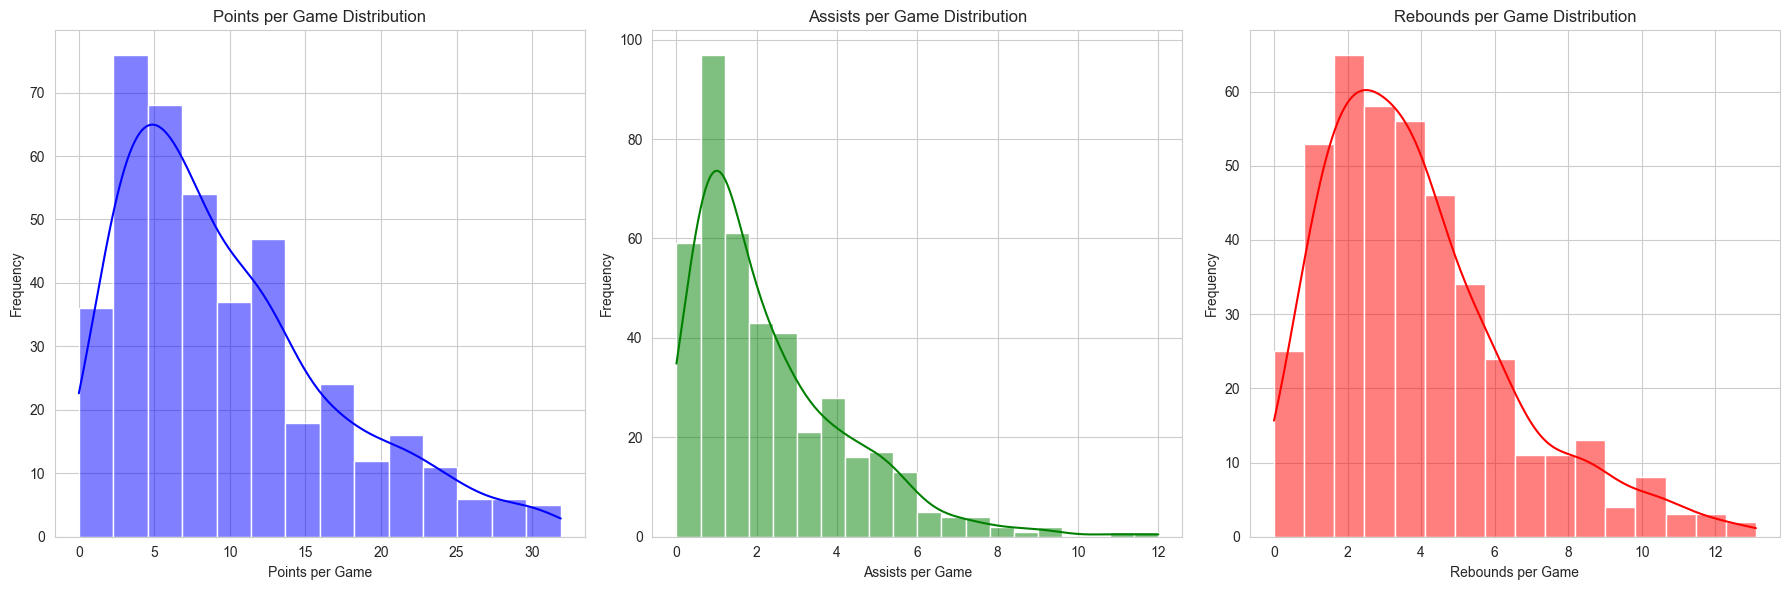

In [121]:
# Due to the nature of the dataset (static, single-season snapshot), we can't perform a time-based trend analysis.
# However, we can analyze distributions and variances within the dataset to infer potential trends.

# Plotting distributions of key metrics (PTS, AST, TRB) to infer trends
plt.figure(figsize=(18, 6))

# Points per Game Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['PTS'], kde=True, color='blue')
plt.title('Points per Game Distribution')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')

# Assists per Game Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['AST'], kde=True, color='green')
plt.title('Assists per Game Distribution')
plt.xlabel('Assists per Game')
plt.ylabel('Frequency')

# Rebounds per Game Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['TRB'], kde=True, color='red')
plt.title('Rebounds per Game Distribution')
plt.xlabel('Rebounds per Game')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Points per Game Distribution

The distribution of points per game (PTS) shows a skew towards lower scoring averages, with a smaller number of players achieving very high points per game. This pattern is typical in basketball, where a few players tend to be the primary scorers on their teams.

Assists per Game Distribution

Assists per game (AST) also display a skewed distribution, with most players averaging a lower number of assists. High assist averages are less common, likely concentrated among point guards and primary ball handlers.

Rebounds per Game Distribution

The rebounds per game (TRB) distribution shows that most players have moderate rebounding numbers, with fewer players excelling significantly in this area. Rebounding tends to be more evenly distributed among players, especially between forwards and centers.

Insights

These distributions suggest a typical structure of a basketball league where different players specialize in different aspects of the game.
The skewness in points and assists indicates the presence of specific roles within teams, where certain players are responsible for most of the scoring or playmaking.
The distribution of rebounds suggests a more even contribution across different players, though with some excelling more than others.

## Field goal percentage by Team

In [139]:
fig2 = px.box(df, x="Tm", y="FG%", title="Field goal percentage by Team")
fig2.update_xaxes(title_text='Team')  # Replace 'Team' with your desired x-axis label
fig2.update_yaxes(title_text='Field Goal Percentage')  # Replace 'Field Goal Percentage' with your desired y-axis label
fig2.show()

In [141]:
fig2 = px.box(df, x="Tm", y="FG%", title="Field goal percentage by Team", color='Tm', color_discrete_map={'Tm': 'coolwarm'})
fig2.update_xaxes(title_text='Team')  # Replace 'Team' with your desired x-axis label
fig2.update_yaxes(title_text='Field Goal Percentage')  # Replace 'Field Goal Percentage' with your desired y-axis label
fig2.show()

In [144]:
x = df.sort_values('MP', ascending=False).reset_index()
player_top_25 = x.loc[:24, :]
player_top_25.head()
# Goal Contributions of the Top 50 Players with the Most Minutes Per Match

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Color,Marker_Size,Position,Basic Efficiency
0,275,Tyrese Maxey,PG,23,PHI,14,14,38.7,9.4,20.2,...,7.0,0.9,0.7,1.4,1.8,27.0,magenta,5,magenta,27.7
1,439,Fred VanVleet,PG,29,HOU,12,12,37.1,5.7,14.9,...,9.3,0.6,0.3,1.7,1.8,16.6,magenta,5,magenta,19.5
2,115,Kevin Durant,PF,35,PHO,14,14,37.1,11.0,20.6,...,5.7,0.8,1.1,3.9,1.9,31.4,green,5,green,31.5
3,391,Shaedon Sharpe,SG,20,POR,14,13,36.9,5.7,14.5,...,3.0,0.9,0.5,3.4,2.9,17.1,blue,5,blue,14.0
4,414,Jayson Tatum,PF,25,BOS,14,14,36.9,10.1,20.0,...,4.1,1.1,0.4,3.1,2.3,28.2,green,5,green,28.7


In [145]:
fig = go.Figure(
    data=go.Bar(
        x=player_top_25.Player,
        y=player_top_25['3P'],
        hovertemplate='<b>Player:</b> %{x}<br><b>Minutes played per game:</b> %{text}',
        text=player_top_25['MP']
    )
)

fig.update_layout(
    title='Top 25 Players with Most Minutes Per Game 3-point field goals per game',
    yaxis=dict(title='3-point field goals per game')
)

fig.show()

# Shot Charts

In [1]:
import warnings

# Suppress Matplotlib font family warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [2]:
#!pip install nba_api

In [3]:
from nba_api.stats.endpoints import shotchartdetail, playercareerstats
from nba_api.stats.static import players, teams
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

In [4]:
class NbaScraper:
    """ Class to scrape data from the NBA official website.
    """
    @staticmethod
    def get_json_from_name(name: str, is_player=True) -> int:
        """ Get the json of a player or team from his name
        """
        from nba_api.stats.static import players, teams
        if is_player:
            nba_players = players.get_players()
            return [player for player in nba_players 
                    if player['full_name'] == name][0]
        else:
            nba_teams = teams.get_teams()
            return [team for team in nba_teams 
                    if team['full_name'] == name][0]
    
    @staticmethod
    def get_player_career(player_id: int) -> list:
        """ Get the career of a player from his id
        """
        from nba_api.stats.endpoints import playercareerstats
        career = playercareerstats.PlayerCareerStats(player_id=player_id)
        return career.get_data_frames()[0]
    
    @staticmethod
    def get_shot_data(id: int, team_ids: list, seasons: list) -> list:
        """ Get the shot data of a player from his id and seasons
        """
        from nba_api.stats.endpoints import shotchartdetail
        df = pd.DataFrame()
        for season in seasons:
            for team in team_ids:
                shot_data = shotchartdetail.ShotChartDetail(
                    team_id=team,
                    player_id=id,
                    context_measure_simple='FGA',
                    season_nullable=season
                )
                df = pd.concat([df, shot_data.get_data_frames()[0]])
        
        return df
    
    @staticmethod
    def get_all_ids(only_active=True) -> list:
        """ Get all the ids of the players
        """
        from nba_api.stats.static import players
        nba_players = players.get_players()
        if only_active:
            return [player['id'] for player in nba_players 
                    if player['is_active']]
        return [player['id'] for player in nba_players]
    
    @staticmethod
    def get_player_headshot(id: int) -> str:
            """ Get the headshot of a player from his id
            """
            from nba_api.stats.static import players
            import requests
            import shutil
            
            url = f'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/{id}.png'
            output_path = f'../data/nba/transient/headshots/{id}.png'
            r = requests.get(url, stream=True)
            if r.status_code == 200:
                with open(output_path, 'wb') as f:
                    r.raw.decode_content = True
                    shutil.copyfileobj(r.raw, f)
    
    @staticmethod                                    
    def get_all_nba_headshots(only_active=False) -> None:
        """ Get the headshots of all the players
        """
        ids = NbaScraper.get_all_ids(only_active=only_active)
        for id in ids:
            NbaScraper.get_player_headshot(id)

In [5]:
class ShotCharts:
        def __init__(self) -> None:
                pass
        
        def create_court(ax: mpl.axes, color="white") -> mpl.axes:
                """ Create a basketball court in a matplotlib axes
                """
                # Short corner 3PT lines
                ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
                ax.plot([220, 220], [0, 140], linewidth=2, color=color)
                # 3PT Arc
                ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
                # Lane and Key
                ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
                ax.plot([80, 80], [0, 190], linewidth=2, color=color)
                ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
                ax.plot([60, 60], [0, 190], linewidth=2, color=color)
                ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
                ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
                ax.plot([-250, 250], [0, 0], linewidth=4, color='white')
                # Rim
                ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
                # Backboard
                ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
                # Remove ticks
                ax.set_xticks([])
                ax.set_yticks([])
                # Set axis limits
                ax.set_xlim(-250, 250)
                ax.set_ylim(0, 470)
                return ax
        
        def add_headshot(fig: plt.figure, id: int) -> plt.figure:
                headshot_url = "https://github.com/ubiratanfilho/HotShot/blob/main/data/nba/raw/headshots/" + str(id) + ".png?raw=true" 
                response = requests.get(headshot_url)
                img = Image.open(BytesIO(response.content))
                ax = fig.add_axes([0.06, 0.01, 0.3, 0.3], anchor='SW')
                ax.imshow(img)
                ax.axis('off')
                return fig
                
        
        
        
        #def add_headshot(fig: plt.figure, id: int) -> plt.figure:
                #headshot_path = "https://github.com/ubiratanfilho/HotShot/blob/main/data/nba/raw/headshots/"+ str(id) +".png?raw=true" 
                #im = plt.imread(headshot_path)
                #ax = fig.add_axes([0.06, 0.01, 0.3, 0.3], anchor='SW')
                #ax.imshow(im)
                #ax.axis('off')
                #return fig
        
        def frequency_chart(df: pd.DataFrame, name: str, season=None, extent=(-250, 250, 422.5, -47.5),
                                gridsize=25, cmap="inferno"):
                """ Create a shot chart of a player's shot frequency and accuracy
                """ 
                # create frequency of shots per hexbin zone
                shots_hex = plt.hexbin(
                df.LOC_X, df.LOC_Y + 60,
                extent=extent, cmap=cmap, gridsize=gridsize)
                plt.close()
                shots_hex_array = shots_hex.get_array()
                freq_by_hex = shots_hex_array / sum(shots_hex_array)
                
                # create field goal % per hexbin zone
                makes_df = df[df.SHOT_MADE_FLAG == 1] # filter dataframe for made shots
                makes_hex = plt.hexbin(makes_df.LOC_X, makes_df.LOC_Y + 60, cmap=cmap,
                                gridsize=gridsize, extent=extent) # create hexbins
                plt.close()
                pcts_by_hex = makes_hex.get_array() / shots_hex.get_array()
                pcts_by_hex[np.isnan(pcts_by_hex)] = 0  # convert NAN values to 0
                
                # filter data for zone with at least 5 shots made
                sample_sizes = shots_hex.get_array()
                filter_threshold = 5
                for i in range(len(pcts_by_hex)):
                        if sample_sizes[i] < filter_threshold:
                                pcts_by_hex[i] = 0
                x = [i[0] for i in shots_hex.get_offsets()]
                y = [i[1] for i in shots_hex.get_offsets()]
                z = pcts_by_hex
                sizes = freq_by_hex * 1000
                
                # Create figure and axes
                fig = plt.figure(figsize=(3.6, 3.6), facecolor='black', edgecolor='black', dpi=100)
                ax = fig.add_axes([0, 0, 1, 1], facecolor='black')
                plt.xlim(250, -250)
                plt.ylim(-47.5, 422.5)
                # Plot hexbins
                scatter = ax.scatter(x, y, c=z, cmap=cmap, marker='h', s=sizes)
                # Draw court
                ax = ShotCharts.create_court(ax)
                # Add legends
                max_freq = max(freq_by_hex)
                max_size = max(sizes)
                legend_acc = plt.legend(
                *scatter.legend_elements(num=5, fmt="{x:.0f}%",
                                        func=lambda x: x * 100),
                loc=[0.85,0.785], title='Shot %', fontsize=6)
                legend_freq = plt.legend(
                *scatter.legend_elements(
                        'sizes', num=5, alpha=0.8, fmt="{x:.1f}%"
                        , func=lambda s: s / max_size * max_freq * 100
                ),
                loc=[0.68,0.785], title='Freq %', fontsize=6)
                plt.gca().add_artist(legend_acc)
                # Add title
                plt.text(-250, 450, f"{name}", fontsize=21, color='white',
                        fontname='Arial')
                plt.text(-250, 420, "Frequency and FG%", fontsize=12, color='white',
                        fontname='Arial')
                season = f"{season[0][:4]}-{season[-1][-2:]}"
                plt.text(-250, -20, season, fontsize=8, color='white')
                #plt.text(110, -20, '@hotshot_nba', fontsize=8, color='white')
                
                # add headshot
                fig = ShotCharts.add_headshot(fig, df.PLAYER_ID.iloc[0])

                return fig
        
        def volume_chart(df: pd.DataFrame, name: str, season=None, 
                        RA=True,
                        extent=(-250, 250, 422.5, -47.5),
                        gridsize=25, cmap="plasma"):
                fig = plt.figure(figsize=(3.6, 3.6), facecolor='black', edgecolor='black', dpi=100)
                ax = fig.add_axes([0, 0, 1, 1], facecolor='black')

                # Plot hexbin of shots
                if RA == True:
                        x = df.LOC_X
                        y = df.LOC_Y + 60
                        # Annotate player name and season
                        plt.text(-250, 440, f"{name}", fontsize=21, color='white',
                                fontname='Arial')
                        plt.text(-250, 410, "Shot Volume", fontsize=12, color='white',
                                fontname='Arial')
                        season = f"{season[0][:4]}-{season[-1][-2:]}"
                        plt.text(-250, -20, season, fontsize=8, color='white')
                        #plt.text(110, -20, '@hotshot_nba', fontsize=8, color='white')
                else:
                        cond = ~((-45 < df.LOC_X) & (df.LOC_X < 45) & (-40 < df.LOC_Y) & (df.LOC_Y < 45))
                        x = df.LOC_X[cond]
                        y = df.LOC_Y[cond] + 60
                        # Annotate player name and season
                        plt.text(-250, 440, f"{name}", fontsize=21, color='white',
                                fontname='Arial')
                        plt.text(-250, 410, "Shot Volume", fontsize=12, color='white',
                                fontname='Arial')
                        plt.text(-250, 385, "(w/o restricted area)", fontsize=10, color='red')
                        season = f"{season[0][:4]}-{season[-1][-2:]}"
                        plt.text(-250, -20, season, fontsize=8, color='white')
                        #plt.text(110, -20, '@hotshot_nba', fontsize=8, color='white')
                        
                hexbin = ax.hexbin(x, y, cmap=cmap,
                        bins="log", gridsize=25, mincnt=2, extent=(-250, 250, 422.5, -47.5))

                # Draw court
                ax = ShotCharts.create_court(ax, 'white')

                # add colorbar
                #im = plt.imread("https://github.com/ubiratanfilho/HotShot/blob/main/images/Colorbar%20Shotcharts.png?raw=true")
                #newax = fig.add_axes([0.56, 0.6, 0.45, 0.4], anchor='NE', zorder=1)
                #newax.xaxis.set_visible(False)
                #newax.yaxis.set_visible(False)
                #newax.imshow(im)
                url = "https://github.com/ubiratanfilho/HotShot/blob/main/images/Colorbar%20Shotcharts.png?raw=true"
                response = requests.get(url)
                img = Image.open(BytesIO(response.content))
                colorbar_data = np.array(img)
                
                
                # add colorbar
                newax = fig.add_axes([0.56, 0.6, 0.45, 0.4], anchor='NE', zorder=1)
                newax.xaxis.set_visible(False)
                newax.yaxis.set_visible(False)
                newax.imshow(colorbar_data)
                
                
                # add headshot
                fig = ShotCharts.add_headshot(fig, df.PLAYER_ID.iloc[0])

                return fig
        
        def makes_misses_chart(df: pd.DataFrame, name: str, season=None):
                # Create figure and axes
                fig = plt.figure(figsize=(3.6, 3.6), facecolor='black', edgecolor='black', dpi=100)
                ax = fig.add_axes([0, 0, 1, 1], facecolor='black')

                plt.text(-250, 450, f"{name}", fontsize=21, color='white',
                        fontname='Arial')
                plt.text(-250, 425, "Misses", fontsize=12, color='red',
                        fontname='Arial')
                plt.text(-170, 425, "&", fontsize=12, color='white',
                        fontname='Arial')
                plt.text(-150, 425, "Buckets", fontsize=12, color='green',
                        fontname='Arial')
                season = f"{season[0][:4]}-{season[-1][-2:]}"
                plt.text(-250, -20, season, fontsize=8, color='white')
                #plt.text(110, -20, '@hotshot_nba', fontsize=8, color='white')

                ax = ShotCharts.create_court(ax, 'white')
                sc = ax.scatter(df.LOC_X, df.LOC_Y + 60, c=df.SHOT_MADE_FLAG, cmap='RdYlGn', s=12)
                
                # add headshot
                fig = ShotCharts.add_headshot(fig, df.PLAYER_ID.iloc[0])

                return fig

## Loading Data

In [6]:
# get player id
name = "LeBron James"
id = NbaScraper.get_json_from_name(name)['id']
print(id)
career = NbaScraper.get_player_career(id)
teams = ['LAL']
team_ids = list(set(career[career.TEAM_ABBREVIATION.isin(teams)].TEAM_ID.values))

seasons = ['2022-23']
shot_data = NbaScraper.get_shot_data(id, team_ids, seasons)
shot_data.tail()

2544


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
1214,Shot Chart Detail,0022201228,575,2544,LeBron James,1610612747,Los Angeles Lakers,4,3,32,...,Center(C),24+ ft.,30,-75,294,1,1,20230409,LAL,UTA
1215,Shot Chart Detail,0022201228,580,2544,LeBron James,1610612747,Los Angeles Lakers,4,2,55,...,Center(C),24+ ft.,29,60,284,1,0,20230409,LAL,UTA
1216,Shot Chart Detail,0022201228,594,2544,LeBron James,1610612747,Los Angeles Lakers,4,1,59,...,Center(C),Less Than 8 ft.,5,20,56,1,0,20230409,LAL,UTA
1217,Shot Chart Detail,0022201228,605,2544,LeBron James,1610612747,Los Angeles Lakers,4,1,7,...,Center(C),24+ ft.,25,-29,253,1,1,20230409,LAL,UTA
1218,Shot Chart Detail,0022201228,609,2544,LeBron James,1610612747,Los Angeles Lakers,4,0,39,...,Right Side Center(RC),24+ ft.,31,189,251,1,1,20230409,LAL,UTA


In [7]:
shot_data.sort_values(by=['SHOT_DISTANCE'])

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
609,Shot Chart Detail,0022200530,467,2544,LeBron James,1610612747,Los Angeles Lakers,3,3,14,...,Center(C),Less Than 8 ft.,0,2,0,1,0,20221230,ATL,LAL
975,Shot Chart Detail,0022200798,457,2544,LeBron James,1610612747,Los Angeles Lakers,3,3,29,...,Center(C),Less Than 8 ft.,0,9,4,1,1,20230204,NOP,LAL
749,Shot Chart Detail,0022200664,212,2544,LeBron James,1610612747,Los Angeles Lakers,2,10,25,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20230116,LAL,HOU
969,Shot Chart Detail,0022200798,302,2544,LeBron James,1610612747,Los Angeles Lakers,2,2,58,...,Center(C),Less Than 8 ft.,0,-2,8,1,1,20230204,NOP,LAL
138,Shot Chart Detail,0022200117,299,2544,LeBron James,1610612747,Los Angeles Lakers,2,1,57,...,Center(C),Less Than 8 ft.,0,-4,7,1,1,20221102,LAL,NOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Shot Chart Detail,0022200360,55,2544,LeBron James,1610612747,Los Angeles Lakers,1,7,0,...,Center(C),24+ ft.,32,-82,312,1,0,20221206,CLE,LAL
420,Shot Chart Detail,0022200413,332,2544,LeBron James,1610612747,Los Angeles Lakers,2,0,1,...,Center(C),24+ ft.,32,65,323,1,0,20221213,LAL,BOS
42,Shot Chart Detail,0022200016,703,2544,LeBron James,1610612747,Los Angeles Lakers,4,0,2,...,Right Side Center(RC),24+ ft.,32,178,277,1,0,20221020,LAL,LAC
56,Shot Chart Detail,0022200037,542,2544,LeBron James,1610612747,Los Angeles Lakers,3,0,0,...,Center(C),24+ ft.,33,-33,330,1,0,20221023,LAL,POR


## Charts

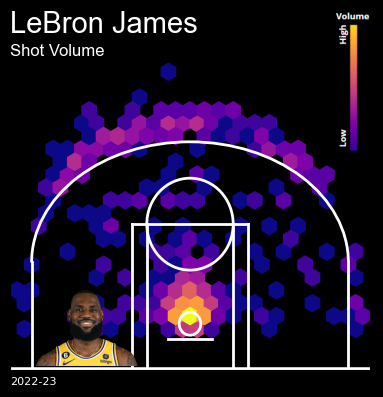

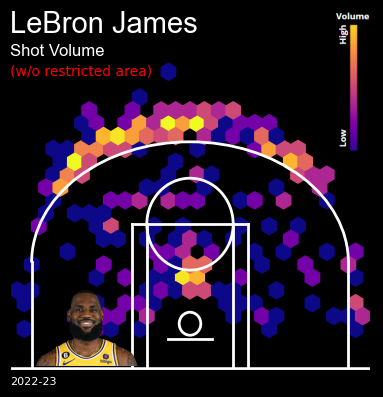

In [8]:
chart1 = ShotCharts.volume_chart(shot_data, name, seasons)
chart2 = ShotCharts.volume_chart(shot_data, name, seasons, RA=False)
plt.show()

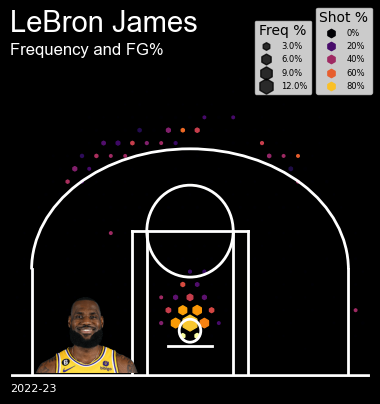

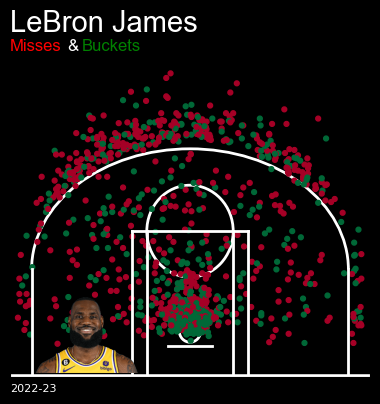

In [9]:
chart3 = ShotCharts.frequency_chart(shot_data, name, seasons)
chart4 = ShotCharts.makes_misses_chart(shot_data, name, seasons)
plt.show()

Enter the player's name: LeBron James
Player ID for LeBron James: 2544
Available columns: Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')
Shot data sorted by 'SHOT_DISTANCE'.


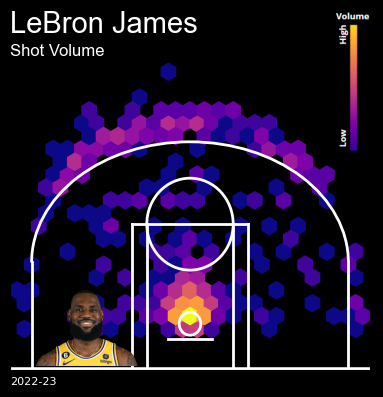

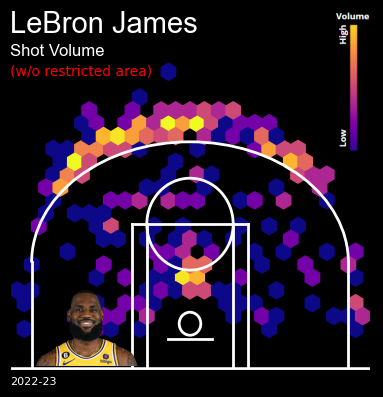

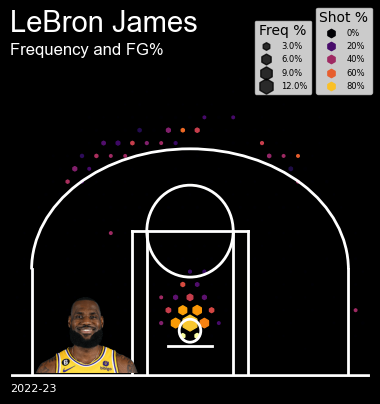

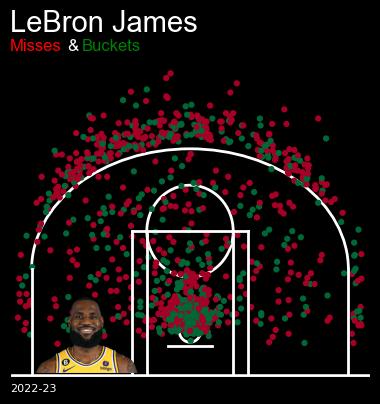

In [18]:
# Dynamically request the user for a player's name
name = input("Enter the player's name: ")

# Get player id
player_info = NbaScraper.get_json_from_name(name)
if player_info:
    id = player_info['id']
    print(f"Player ID for {name}: {id}")
    
    # Get player career and team information
    career = NbaScraper.get_player_career(id)
    teams = ['LAL']  # You can customize the list of teams
    team_ids = list(set(career[career.TEAM_ABBREVIATION.isin(teams)].TEAM_ID.values))
    
    # Specify the season(s) you're interested in
    seasons = ['2022-23']
    
    # Get shot data for the specified player, teams, and seasons
    shot_data = NbaScraper.get_shot_data(id, team_ids, seasons)
    shot_data.tail()
    
    # Sort shot data by shot distance
    #shot_data.sort_values(by=['SHOT_DISTANCE'], inplace=True)
    
    # Print column names to identify available columns
    print("Available columns:", shot_data.columns)
    # Sort shot data by shot distance if the column is present
    if 'SHOT_DISTANCE' in shot_data.columns:
        shot_data.sort_values(by=['SHOT_DISTANCE'], inplace=True)
        print("Shot data sorted by 'SHOT_DISTANCE'.")
    else:
        print("Column 'SHOT_DISTANCE' not found in the DataFrame.")
        


    
    # Create volume charts
    chart1 = ShotCharts.volume_chart(shot_data, name, seasons)
    chart2 = ShotCharts.volume_chart(shot_data, name, seasons, RA=False)
    
    # Show volume charts
    plt.show()

    # Create and show other charts
    chart3 = ShotCharts.frequency_chart(shot_data, name, seasons)
    chart4 = ShotCharts.makes_misses_chart(shot_data, name, seasons)
    plt.show()
    
else:
    print(f"Player '{name}' not found.")